In [1]:
from utils import *

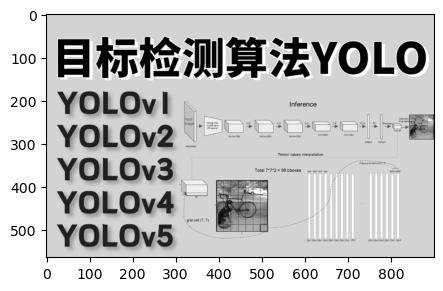

In [4]:
img = readImage('./input/test.png')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
showImage(img_gray, cmap='gray')

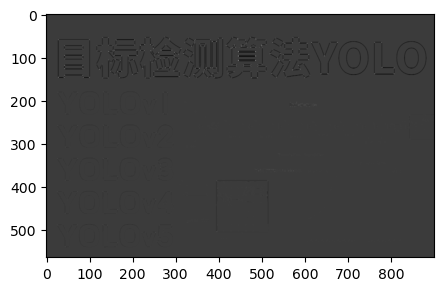

In [5]:
img_gray = img_gray.astype(np.float32)
dst = cv.cornerHarris(img_gray, 2, 3, 0.04)
showImage(dst, cmap='gray')

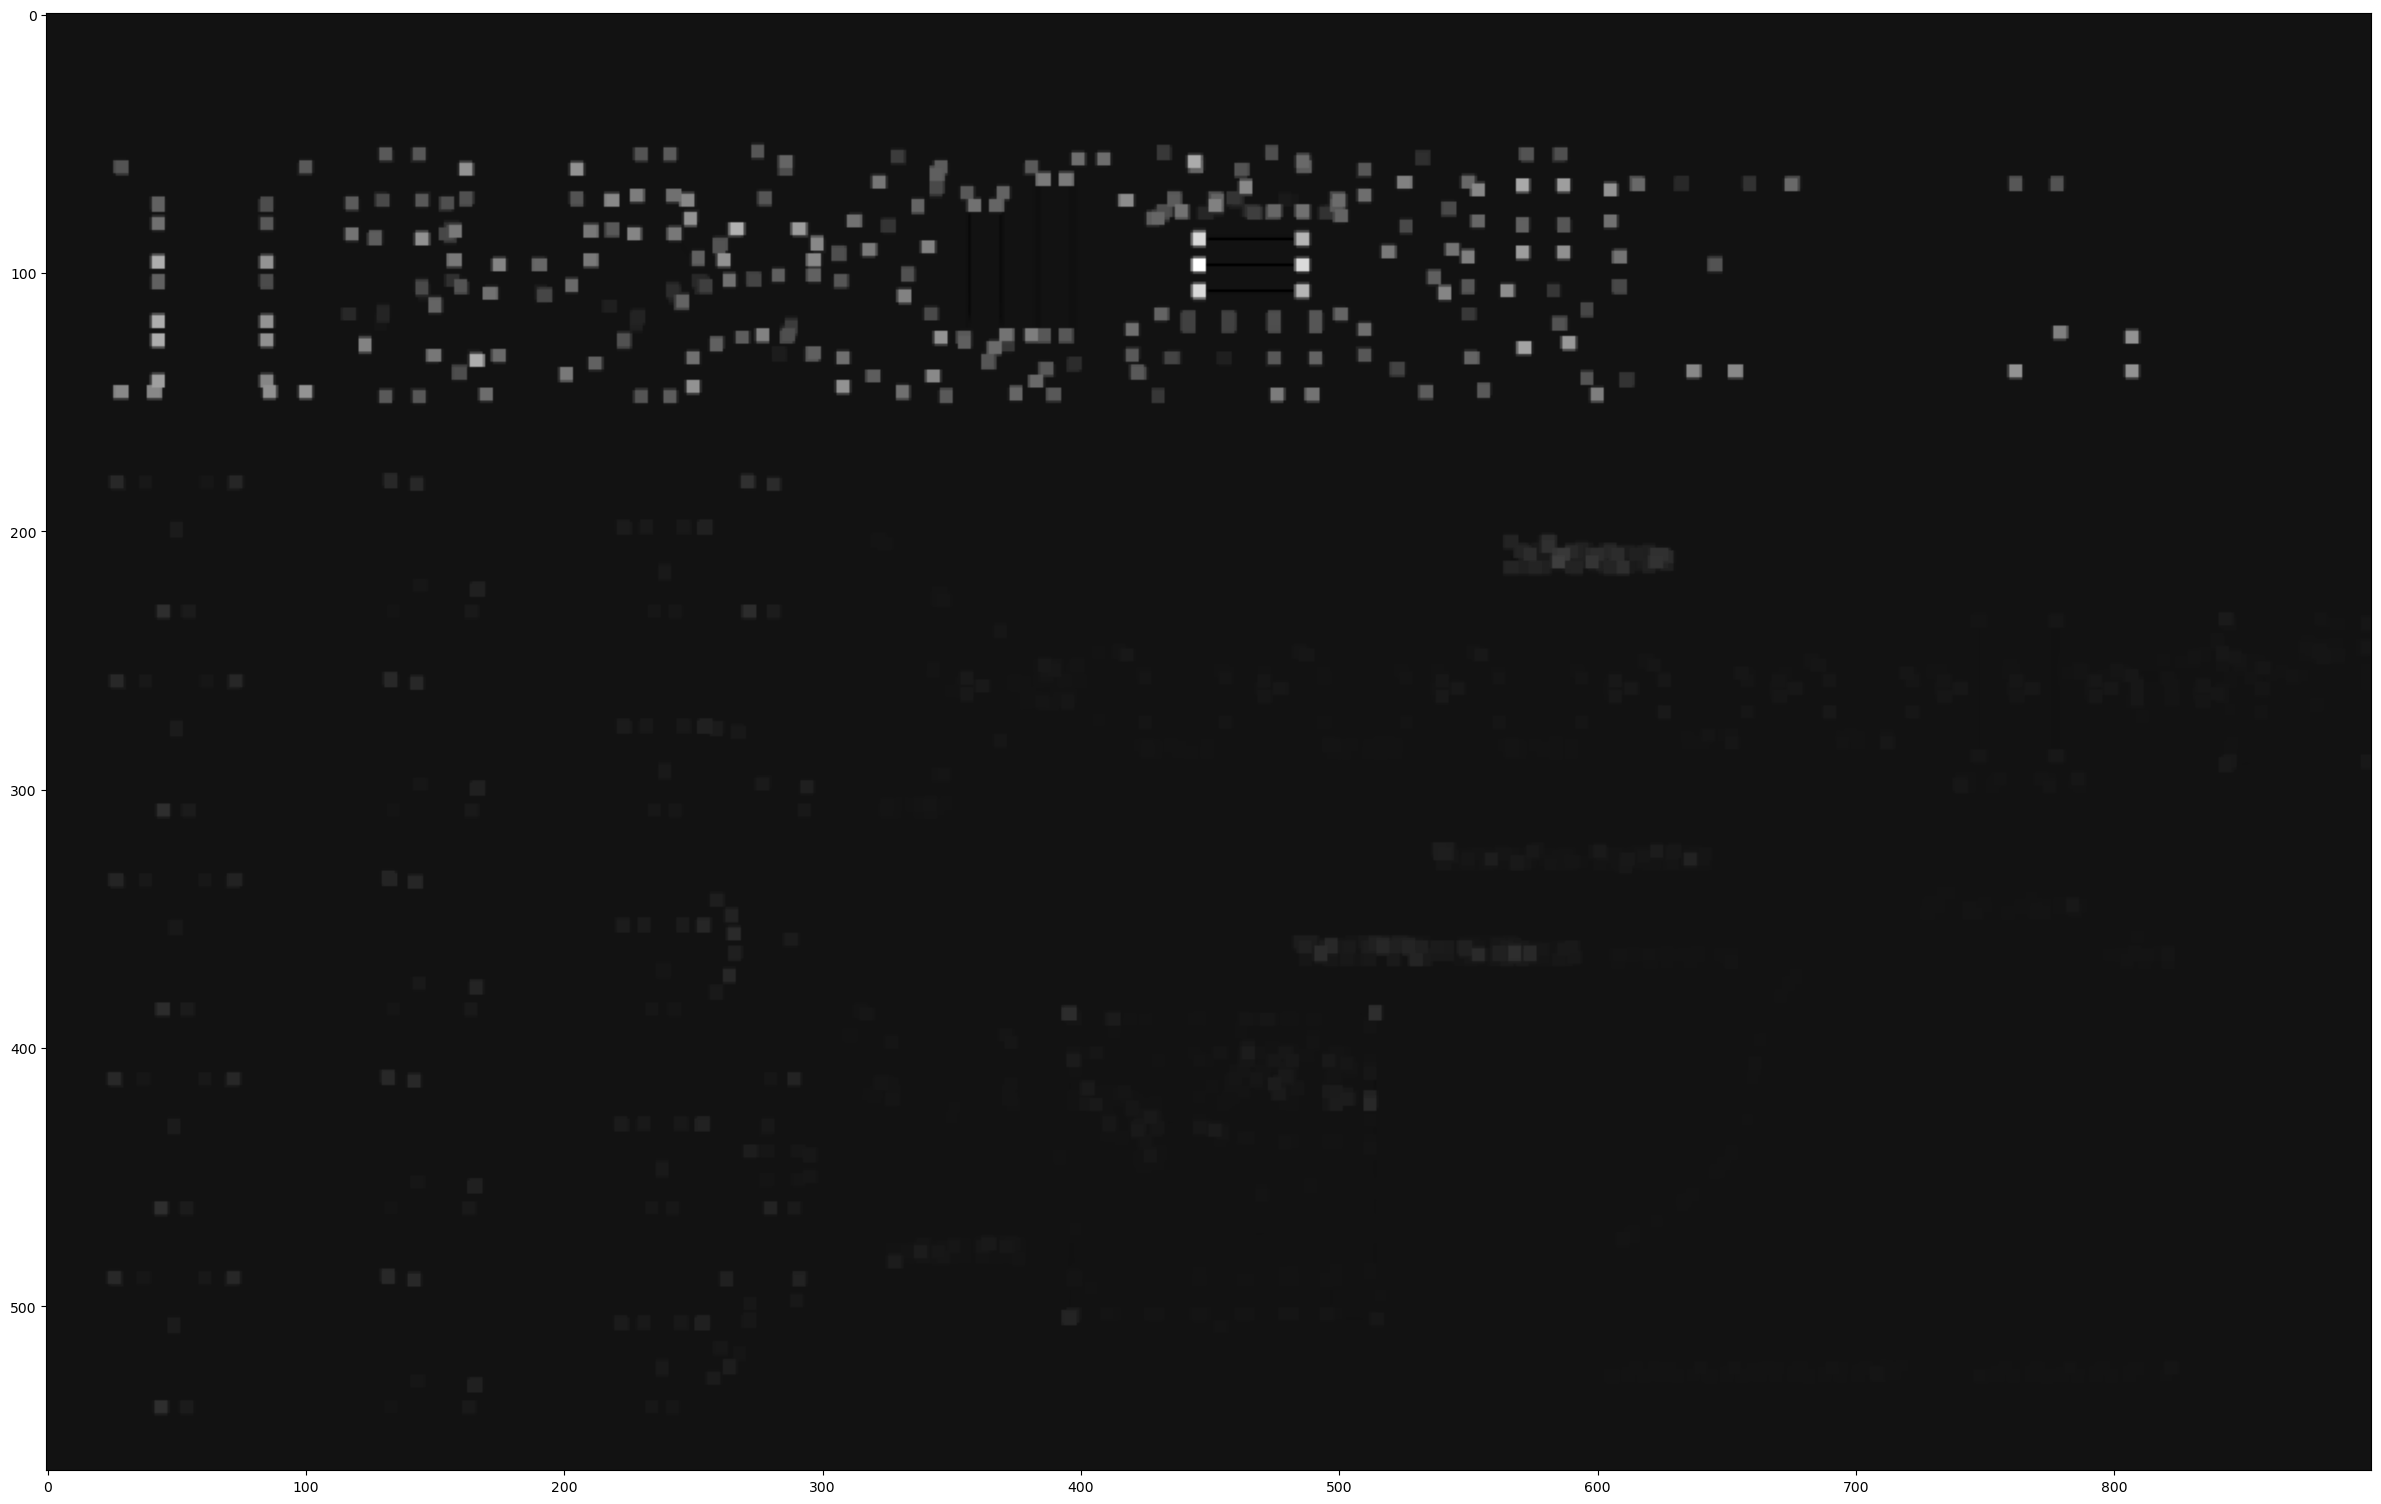

In [7]:
dst = cv.dilate(dst, None)
showImage(dst, cmap='gray', figsize=(30, 30))

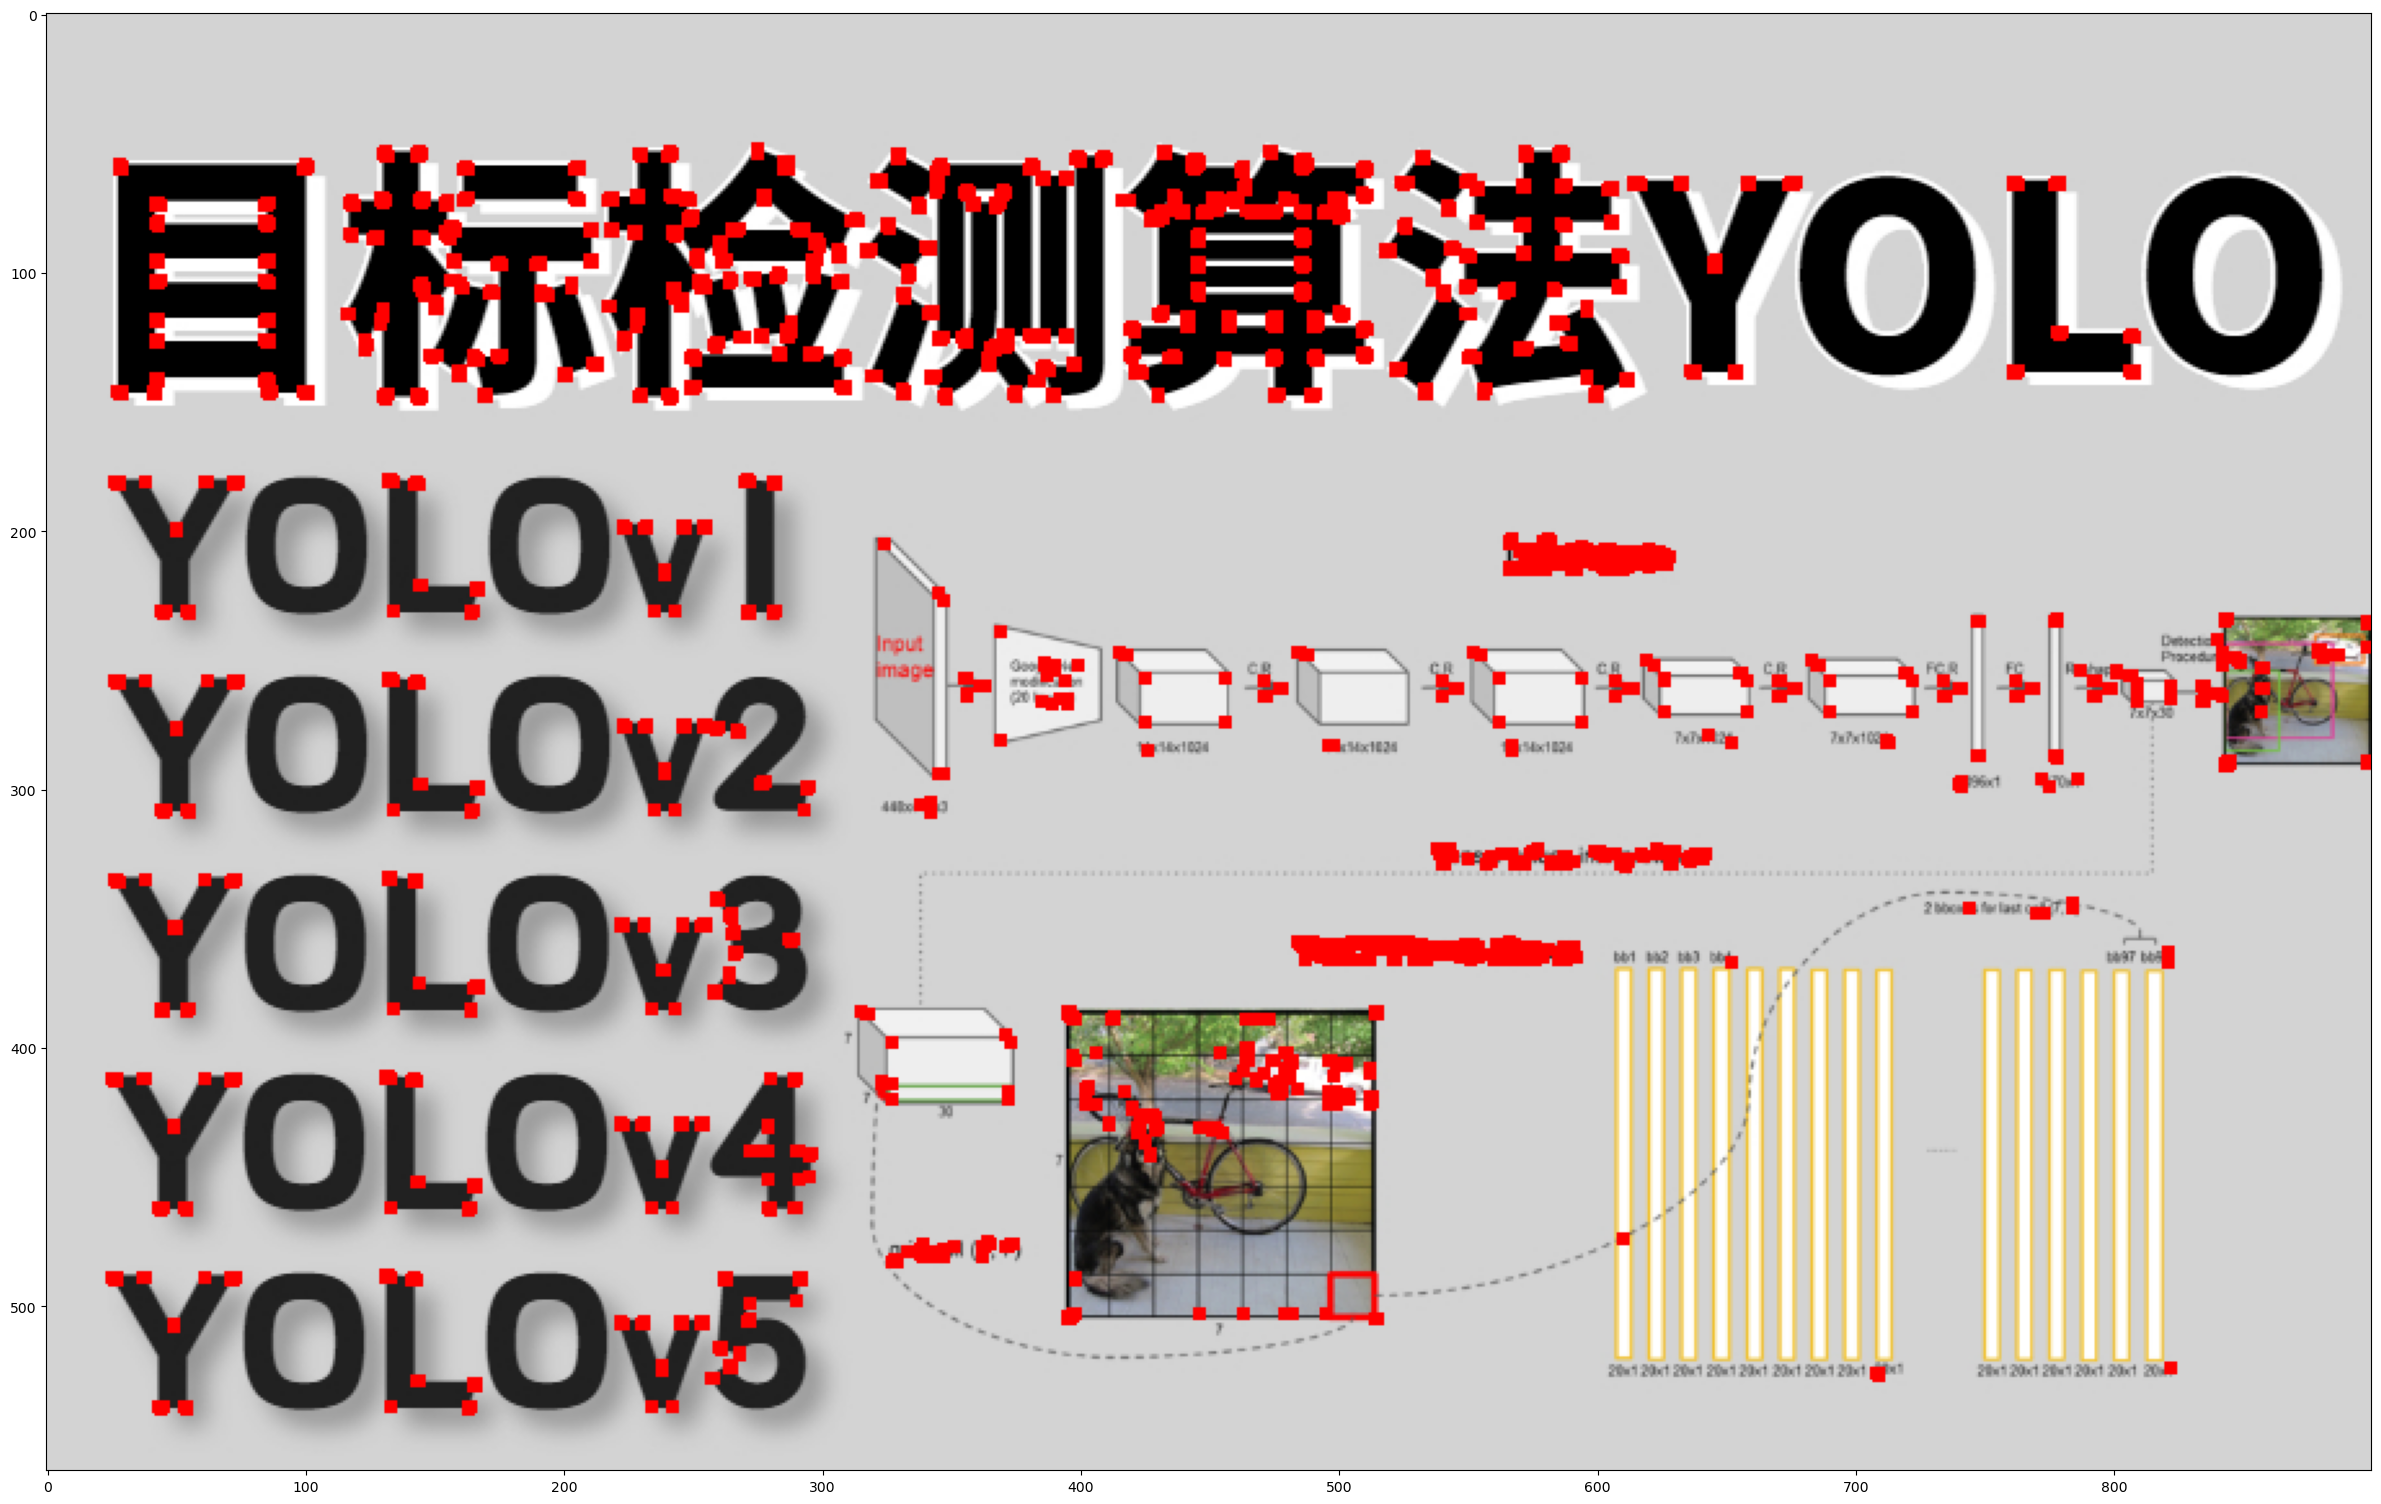

In [9]:
img_tmp = img.copy()
img_tmp[dst>0.01*dst.max()]=[255, 0, 0]
showImage(img_tmp, figsize=(30, 30))

In [10]:
# 寻找哈里斯角
img_gray = np.float32(img_gray)
dst = cv.cornerHarris(img_gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# 寻找质心
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# 定义停止和完善拐角的条件
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(img_gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# 绘制
res = np.hstack((centroids,corners))
res = np.int0(res)
img_tmp = img.copy()
img_tmp[res[:,1],res[:,0]]=[0,0,255]
img_tmp[res[:,3],res[:,2]] = [0,255,0]

C:\Users\25335\AppData\Local\Temp\ipykernel_24524\2821308578.py:14: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


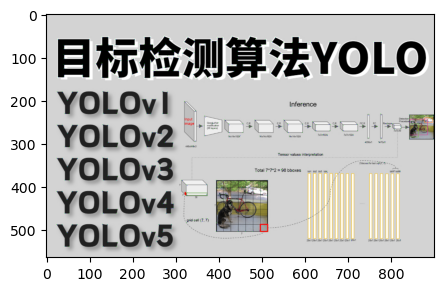

In [11]:
showImage(img_tmp)

C:\Users\25335\AppData\Local\Temp\ipykernel_24524\716825376.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = corners.astype(np.int0)


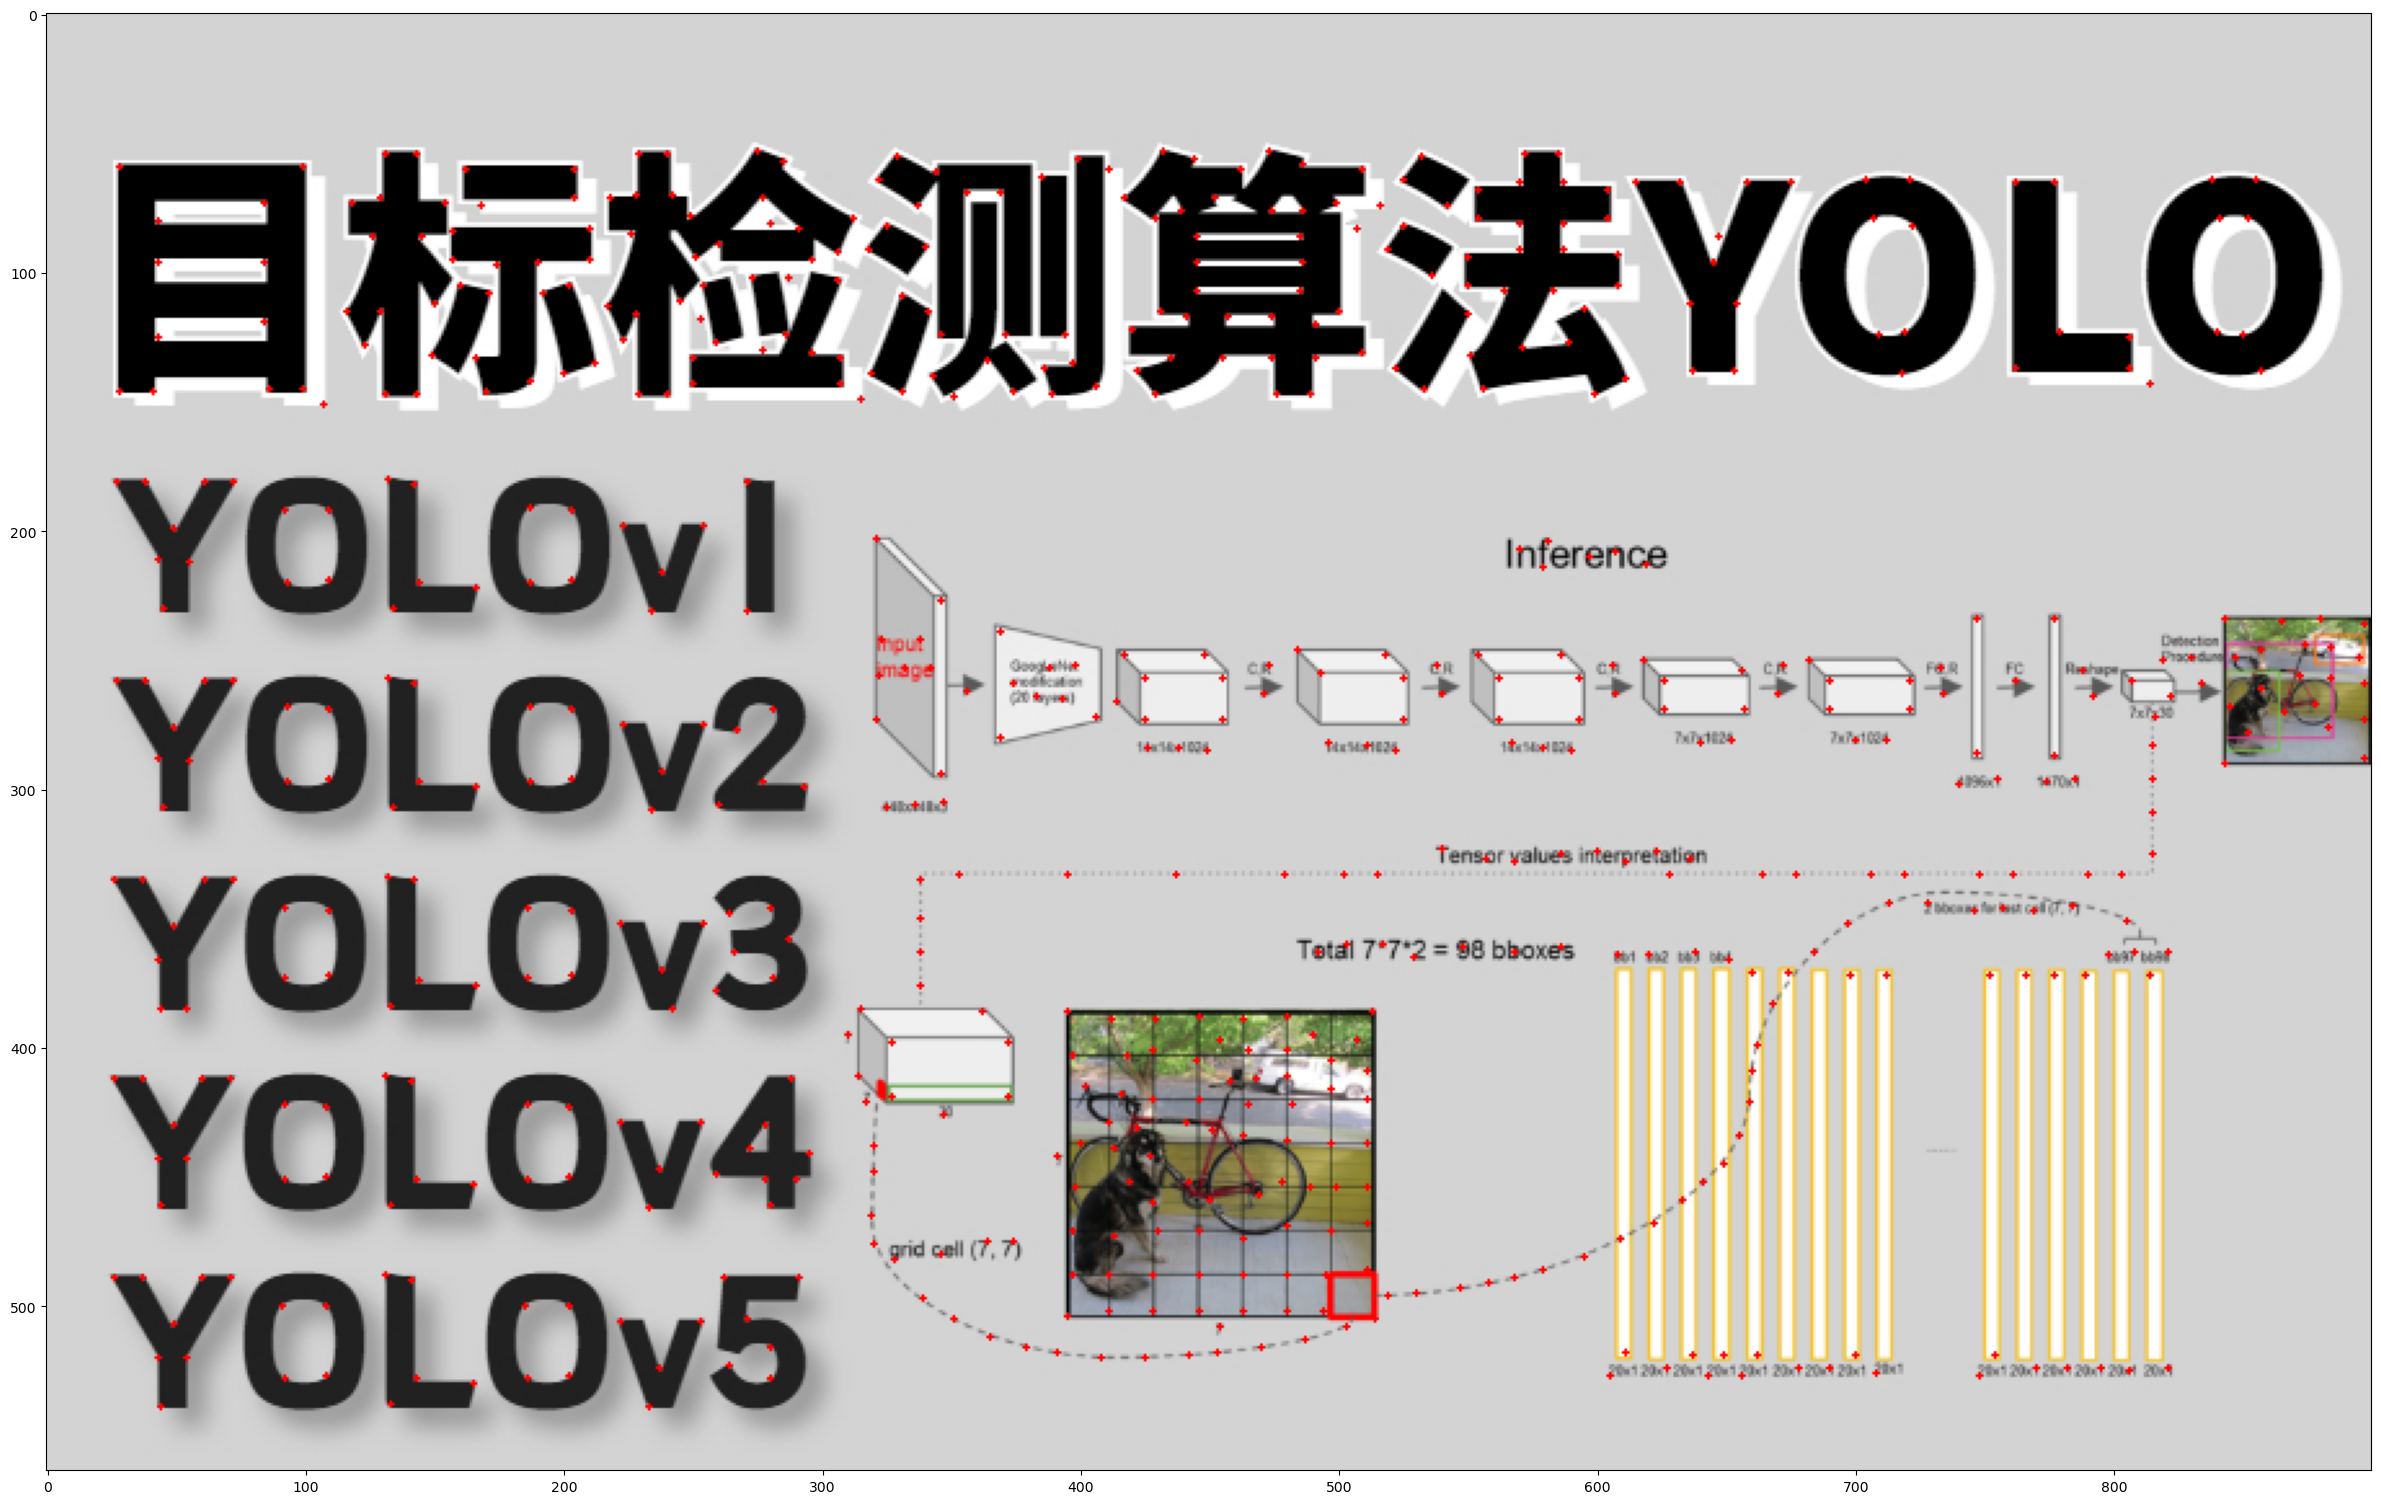

In [18]:
corners = cv.goodFeaturesToTrack(img_gray, 1000, 0.01, 10)
corners = corners.astype(np.int0)
img_tmp = img.copy()
for i in corners:
    x, y = i.ravel()
    cv.circle(img_tmp, (x,y), 1, (255, 0, 0), -1)
showImage(img_tmp, figsize=(30, 30))